In [1]:
import sklearn
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
mnist = fetch_openml("mnist_784",version = 1)

C:\Users\Orefice\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X, y = mnist["data"].to_numpy() , mnist["target"]

In [5]:
X.shape

(70000, 784)

In [6]:
X_train,X_test = X[:50000], X[50000:]
y_train,y_test = y[:50000], y[50000:]

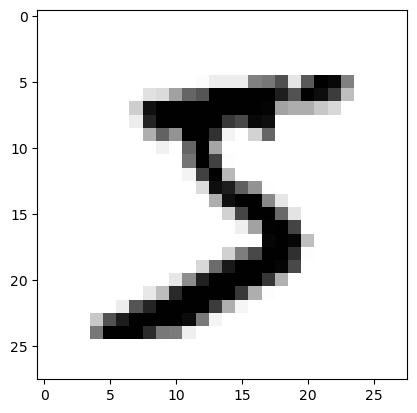

In [8]:
pictures = X_train[0:1].reshape(28,28)
plt.imshow(pictures, cmap = "binary")
plt.show()

In [9]:
y_train[0]

'5'

In [10]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
knc_clf = KNeighborsClassifier(n_neighbors = 5)
knc_clf.fit(X_train,y_train)

KNeighborsClassifier()

In [13]:
predictions = knc_clf.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9691


In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(float))
cross_val_score(knc_clf, X_train_scaled, y_train, cv = 3, scoring = "accuracy")

array([0.9350813 , 0.9401812 , 0.93339734])

In [17]:
predictions = knc_clf.predict(scaler.transform(X_test))
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.10995


In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
param_grid = {
    "n_neighbors":np.arange(3,10),
    "weights":["uniform","distance"],
    "metric":["minkowski","euclidean"]
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 3 , scoring = "accuracy", n_jobs = - 1, verbose = 3)
grid_search.fit(X_train, y_train)
best_knn = grid_search.best_estimator_

Fitting 3 folds for each of 28 candidates, totalling 84 fits


In [20]:
from sklearn.metrics import accuracy_score

y_pred = best_knn.predict(X_test)

print("Accuracy :")
print(accuracy_score(y_test, y_pred))

Accuracy :
0.9715


In [21]:
print(best_knn)

KNeighborsClassifier(n_neighbors=4, weights='distance')


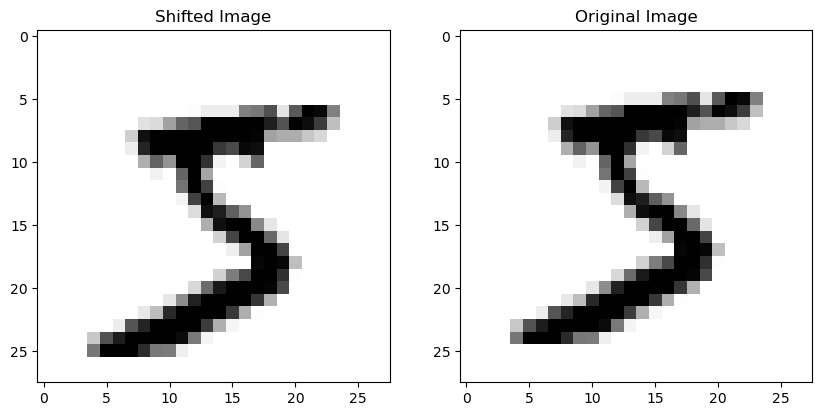

In [22]:
from scipy.ndimage import shift

image_2 = X_train[0:1].reshape(28, 28)
image = shift(image_2, (1, 0))

plt.figure(figsize=(10, 5))

# Display the shifted image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap="binary")
plt.title("Shifted Image")

# Display the original image
plt.subplot(1, 2, 2)
plt.imshow(image_2, cmap="binary")
plt.title("Original Image")

plt.show()


In [23]:
def move_pictures(X: np.array,y: int):
    move_x = [1,-1]
    move_y = [1, - 1]
    new_X = [X.reshape(28,28)]
    new_Y = list([int(y)]*5)
    for x in move_x:
        new_X.append(shift(X.reshape(28,28),(x,0)))
    for Y in move_y:
        new_X.append(shift(X.reshape(28,28),(0,1)))
    return np.array(new_X),np.array(new_Y)

test_x, test_y = move_pictures(X_train[0],y_train[0])

In [24]:
X_train_new = []
y_train_new = []

# Ajout des images décalées
for X, y in zip(X_train, y_train):
    new_X, new_Y = move_pictures(X, y)
    X_train_new.extend(new_X)
    y_train_new.extend(new_Y)

# Conversion des listes en tableaux NumPy
X_train_new = np.array(X_train_new)
y_train_new = np.array(y_train_new)

print("Shape of X_train_new:", X_train_new.shape)
print("Shape of y_train_new:", y_train_new.shape)

Shape of X_train_new: (250000, 28, 28)
Shape of y_train_new: (250000,)


In [25]:
print(X_train.shape)
print(y_train.shape)

(50000, 784)
(50000,)


In [26]:
np.random.seed(42)
indices = np.arange(X_train_new.shape[0])

# Mélanger les indices avec la graine aléatoire définie
np.random.shuffle(indices)

# Appliquer les indices mélangés aux données et étiquettes
X_train_shuffled = X_train_new[indices]
y_train_shuffled = y_train_new[indices].astype(int)

# Vérification des formes
print("Shape of X_train_shuffled:", X_train_shuffled.shape)
print("Shape of y_train_shuffled:", y_train_shuffled.shape)

Shape of X_train_shuffled: (250000, 28, 28)
Shape of y_train_shuffled: (250000,)


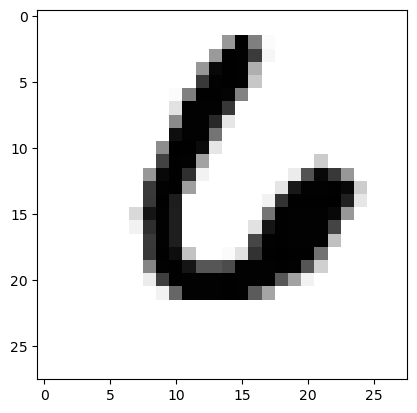

6

In [27]:
plt.imshow(X_train_shuffled[10020],cmap="binary")
plt.show()
y_train_shuffled[10020]

In [28]:
X_train_shuffled = np.array([image.reshape(-1) for image in X_train_shuffled])
X_train_shuffled.shape

(250000, 784)

In [29]:
X_train_shuffled[0].shape

(784,)

In [30]:
param_grid = {
    "n_neighbors":np.arange(3,5),
    "weights":["distance"],
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 3 , scoring = "accuracy", n_jobs = - 1, verbose = 3)

In [31]:
grid_search.fit(X_train_shuffled, y_train_shuffled)
best_knn = grid_search.best_estimator_

Fitting 3 folds for each of 2 candidates, totalling 6 fits


In [32]:
y_pred = best_knn.predict(X_test)

print("Accuracy :")
print(accuracy_score(y_test, y_pred))

Accuracy :
0.97595
